In [1]:
from vega_datasets import data
from scipy.stats import pearsonr
movies_data = data.movies()

In [3]:
movies_data

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,Oct 31 2008,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,20983030.0,85000000.0,Mar 02 2007,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,Aug 11 2006,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,Oct 28 2005,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


In [6]:
cols = movies_data.columns
cols

Index(['Title', 'US_Gross', 'Worldwide_Gross', 'US_DVD_Sales',
       'Production_Budget', 'Release_Date', 'MPAA_Rating', 'Running_Time_min',
       'Distributor', 'Source', 'Major_Genre', 'Creative_Type', 'Director',
       'Rotten_Tomatoes_Rating', 'IMDB_Rating', 'IMDB_Votes'],
      dtype='object')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.DataFrame(movies_data)

In [20]:
ratings_df = df[['IMDB_Rating', 'Rotten_Tomatoes_Rating']]
im_mean = df['IMDB_Rating'].mean()
df['IMDB_Rating'] = df['IMDB_Rating'].fillna(0)
rotten_mean = df['Rotten_Tomatoes_Rating'].mean()
df['Rotten_Tomatoes_Rating'] = df['Rotten_Tomatoes_Rating'].fillna(0)
imdb_ratings = df['IMDB_Rating']
rotten_ratings = df['Rotten_Tomatoes_Rating']
# ratings_df.plot.scatter(x='Rotten_Tomatoes_Rating', y='IMDB_Rating', c='green', alpha=0.5)
# plt.xlabel('Rotten Tomatoes Rating')
# plt.ylabel('IMDB Rating')
# plt.title('IMDB Rating vs. Rotten Tomatoes Rating Scatter Plot')
# plt.tight_layout()
# plt.show()
im_mean, rotten_mean
corr, _ = pearsonr(imdb_ratings, rotten_ratings)
corr

0.4259708986248326

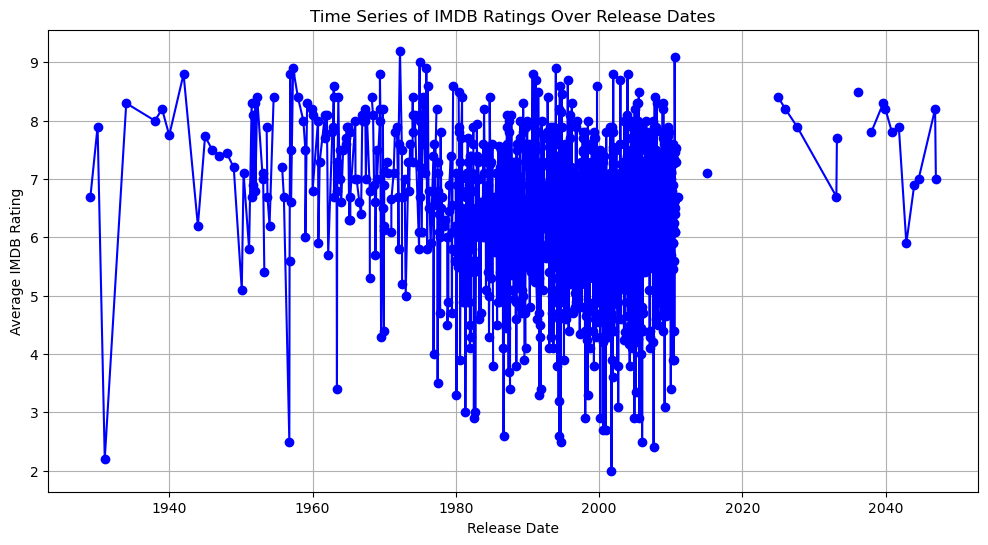

In [33]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
imdb_ratings_by_date = df.groupby('Release_Date')['IMDB_Rating'].mean()
plt.figure(figsize=(12, 6))
plt.plot(imdb_ratings_by_date.index, imdb_ratings_by_date.values, marker='o', linestyle='-', color='b')
plt.xlabel('Release Date')
plt.ylabel('Average IMDB Rating')
plt.title('Time Series of IMDB Ratings Over Release Dates')
plt.grid(True)
plt.show()